# 2. MariaDB Employee Testing

In [2]:
import mariadb
import sys

config = {
    'host': '127.0.0.1',
    'port': 3306,
    'user': 'root',
    'password': 'root',
    'database': 'employees'
}

## Connect to Database 

In [3]:
# connection for MariaDB
try:
    conn = mariadb.connect(**config)

except mariadb.Error as e:
    print(f"Error connecting to MariaDB Platform: {e}")
    sys.exit(1)

# Enable Auto-Commit
conn.autocommit = True

# create a connection cursor
cur = conn.cursor()

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

query = """
SELECT titles.title, salaries.salary, salaries.from_date
FROM titles
INNER JOIN salaries ON titles.emp_no=salaries.emp_no
WHERE titles.title="Senior Engineer"
limit 10000;"""

df = pd.read_sql(query, conn)
df


,title,salary,from_date
0,Senior Engineer,60117,1986-06-26
1,Senior Engineer,62102,1987-06-26
2,Senior Engineer,66074,1988-06-25
3,Senior Engineer,66596,1989-06-25
4,Senior Engineer,66961,1990-06-25
...,...,...,...
9995,Senior Engineer,92424,1990-08-22
9996,Senior Engineer,54083,1986-06-14
9997,Senior Engineer,54484,1987-06-14
9998,Senior Engineer,58120,1988-06-13


In [79]:
df.dtypes

title        object
salary        int64
from_date    object
dtype: object

Linear regression doesn't work on date data. Therefore we need to convert it into numerical value.The following code will convert the date into numerical value.

In [80]:
import datetime as dt

df['from_date'] = pd.to_datetime(df['from_date'])
df['from_date'] = df['from_date'].map(dt.datetime.toordinal)

In [81]:
df

,title,salary,from_date
0,Senior Engineer,60117,725183
1,Senior Engineer,62102,725548
2,Senior Engineer,66074,725913
3,Senior Engineer,66596,726278
4,Senior Engineer,66961,726643
...,...,...,...
9995,Senior Engineer,92424,726701
9996,Senior Engineer,54083,725171
9997,Senior Engineer,54484,725536
9998,Senior Engineer,58120,725901


In [82]:
import numpy as np

X = df[['from_date']].values
X[0:10]

array([[725183],
       [725548],
       [725913],
       [726278],
       [726643],
       [727008],
       [727373],
       [727738],
       [728103],
       [728468]], dtype=int64)

In [83]:
y = df[['salary']].values
y[0:10]

array([[60117],
       [62102],
       [66074],
       [66596],
       [66961],
       [71046],
       [74333],
       [75286],
       [75994],
       [76884]], dtype=int64)

In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Linear Regression Model

In [85]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

0.1663817852993661

In [86]:
reg.coef_, reg.intercept_

(array([[3.74728435]]), array([-2669012.45578515]))

In [87]:
min(X), max(X)

(array([724675], dtype=int64), array([731062], dtype=int64))

In [88]:
X_plot = np.arange(min(X), max(X)).reshape(-1, 1)
X_plot.shape

(6387, 1)

### Plot Model

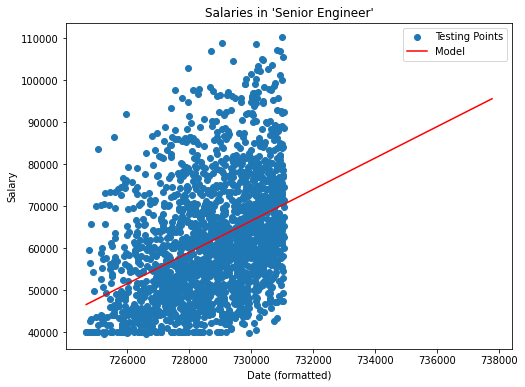

In [126]:
y_plot = reg.predict(X_plot)

plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, label = "Testing Points")
plt.plot(X_plot, y_plot, color = "red", label = "Model")
plt.title("Salaries in 'Senior Engineer'")
plt.xlabel("Date (formatted)")
plt.ylabel("Salary")
plt.legend()


## Prediciton of Salary for today

In [108]:
today = pd.to_datetime(pd.Series("2020-12-08"))
today = today.map(dt.datetime.toordinal)
today.values

array([737767], dtype=int64)

In [120]:
today_predict = reg.predict(today.values.reshape(1,-1))
print(f"Your salary for today: ${np.round(today_predict[0][0])}")

Your salary for today: $95610.0


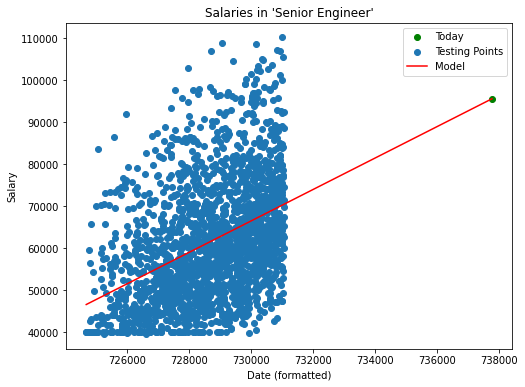

In [127]:
X_plot = np.arange(min(X), today.values).reshape(-1, 1)
y_plot = reg.predict(X_plot)

plt.figure(figsize=(8,6))
plt.scatter(today.values.reshape(1,-1), today_predict, color ="g",label="Today")
plt.scatter(X_test, y_test, label = "Testing Points")
plt.plot(X_plot, y_plot, color = "red", label = "Model")
plt.title("Salaries in 'Senior Engineer'")
plt.xlabel("Date (formatted)")
plt.ylabel("Salary")
plt.legend()